In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
import pandas as pd

df = pd.read_csv('./house.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


- 정규분포가 아닌 값을 로그 변환을 적용하여 정규분포로 만들어 본다

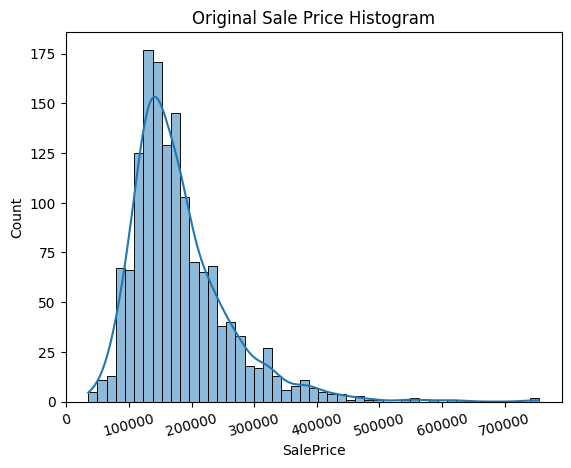

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(df['SalePrice'], kde=True)
plt.show()

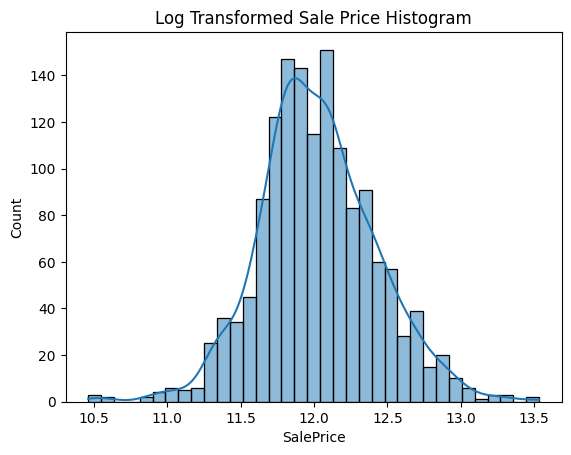

In [5]:
import numpy as np

plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [6]:
original_SalePrice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1, inplace=True)

- 책에서 제공된 코드는 에러 발생
- 숫자형 컬럼에 대해서만 선별적으로 평균값 적용

In [7]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numerical_features, categorical_features

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 

In [8]:
df[df.columns[ df.isnull().sum() > 0 ]].isnull().sum()

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [9]:
df[numerical_features] = df[numerical_features].fillna(value=df[numerical_features].mean())

In [10]:
df[df.columns[ df.isnull().sum() > 0 ]].isnull().sum()

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


- One Hot Encoding

In [12]:
print('get_dummies() 수행 전 데이터 Shape:', df.shape)
df_ohe = pd.get_dummies(df)
print('get_dummies() 수행 후 데이터 Shape:', df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 270)
## Null 피처의 Type :
 Series([], dtype: object)


### 선형 회귀 모델 학습/예측/평가

In [13]:
from sklearn.metrics import mean_squared_error

def get_rmse(model):
    predicts = model.predict(test_X)
    mse = mean_squared_error(test_y, predicts)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__, np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

target_y = df_ohe['SalePrice']
features_X = df_ohe.drop('SalePrice', axis=1, inplace=False)

train_X, test_X, train_y, test_y = train_test_split(features_X, target_y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(train_X, train_y)

ridge_reg = Ridge()
ridge_reg.fit(train_X, train_y)

lasso_reg = Lasso()
lasso_reg.fit(train_X, train_y)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.128
Lasso 로그 변환된 RMSE: 0.192


[0.1297311554205325, 0.12751266078818813, 0.1923052675652488]

In [15]:
def get_top_bottom_coef(model):
    coef = pd.Series(model.coef_, index=features_X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

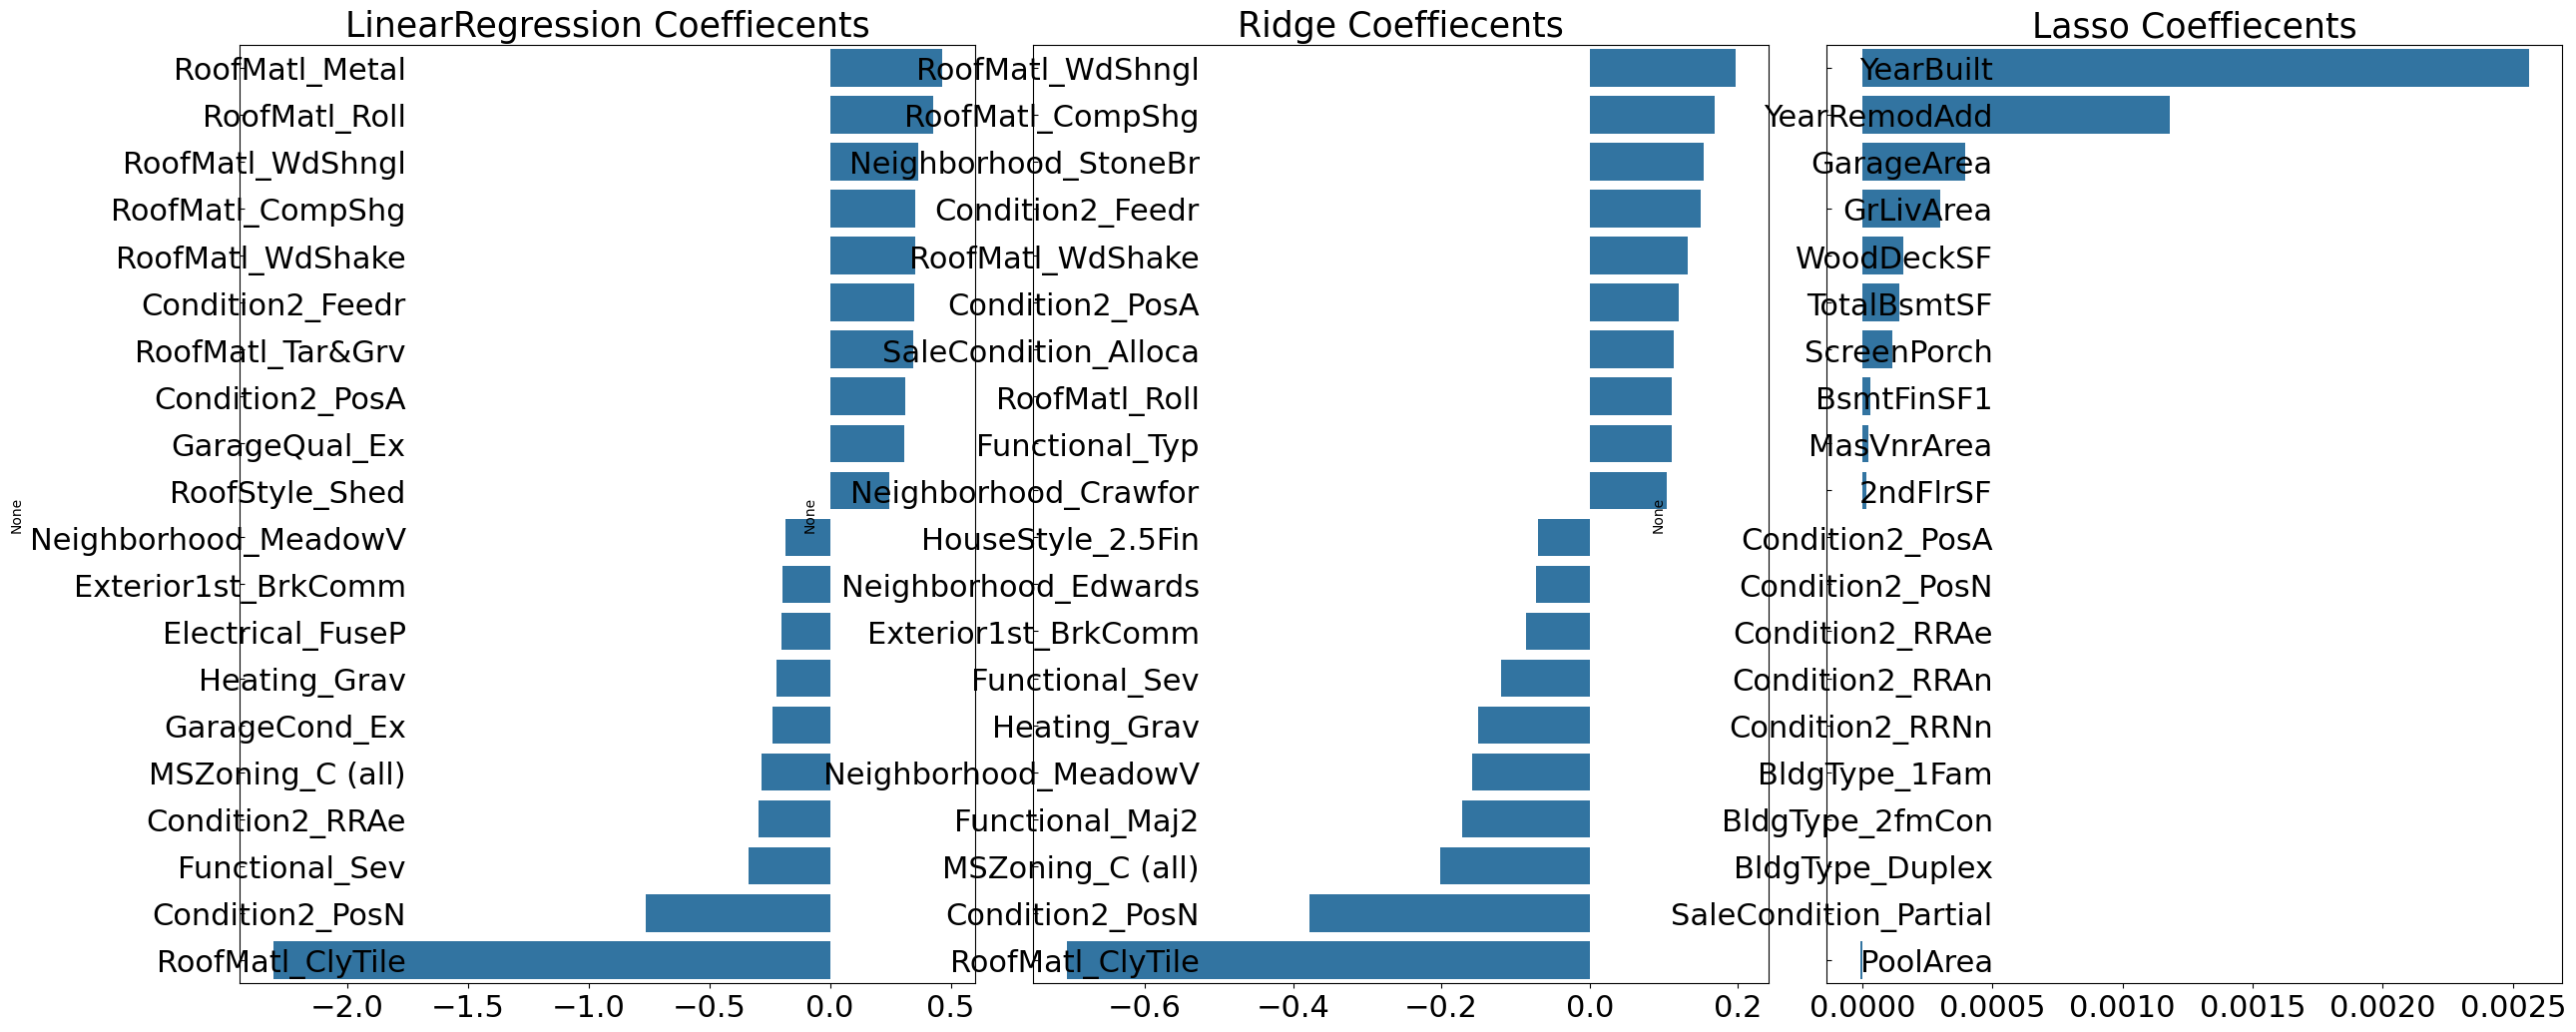

In [16]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout() 

    for i_num, model in enumerate(models):
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )

        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y", direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [17]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, features_X, target_y, scoring="neg_mean_squared_error", cv=5))
        rmse_avg = np.mean(rmse_list)
        
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [1.350000e-01 3.551742e+03 1.670000e-01 1.110000e-01 1.980000e-01]
LinearRegression CV 평균 RMSE 값: 710.471

Ridge CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

Lasso CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


In [18]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(features_X, target_y)
    
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1418, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.142, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.136
Lasso 로그 변환된 RMSE: 0.138


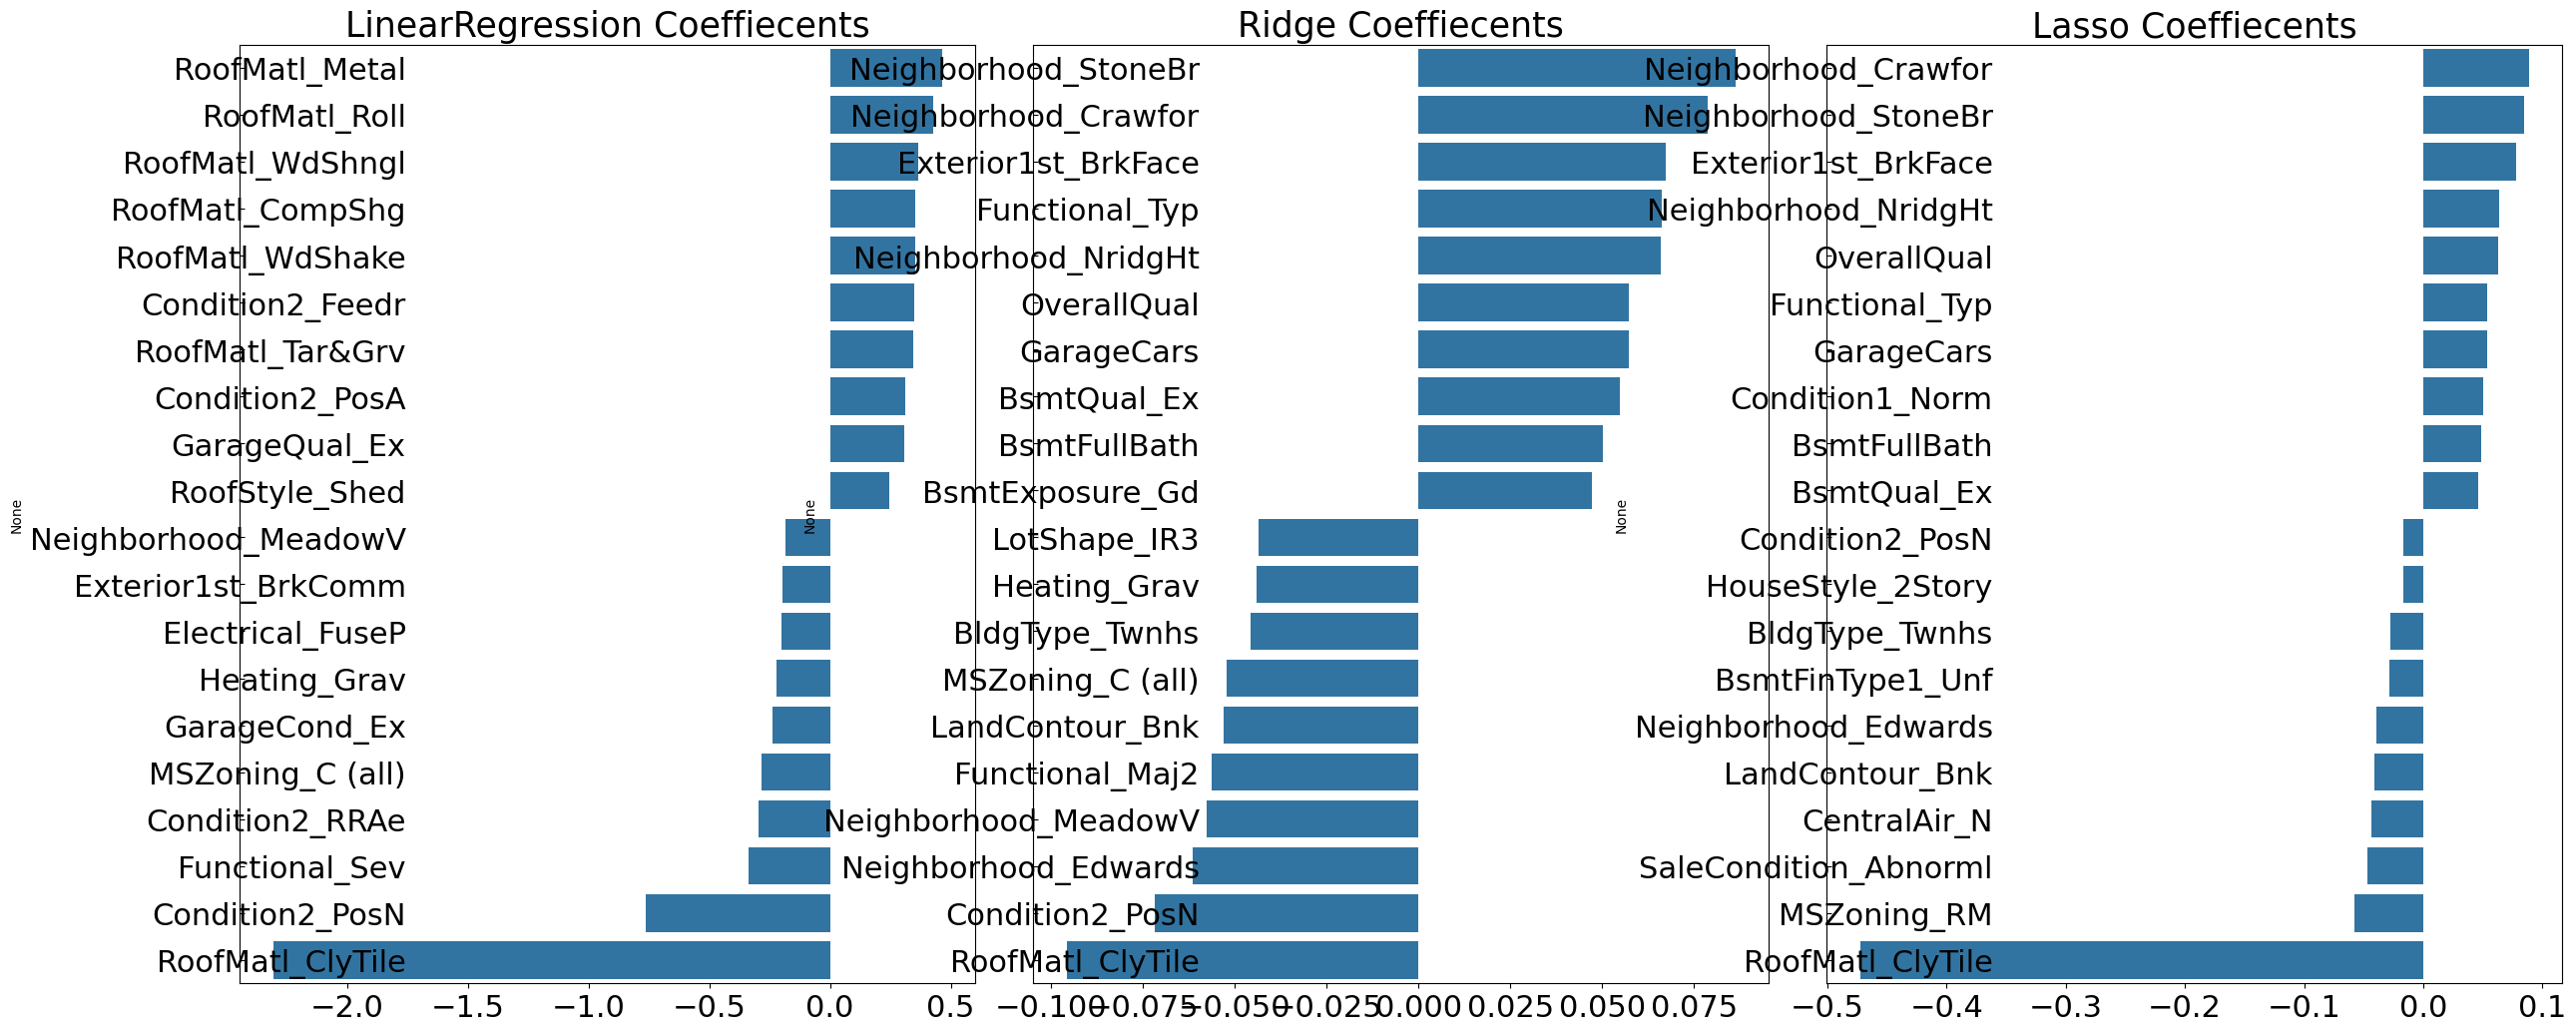

In [19]:
lr_reg = LinearRegression()
lr_reg.fit(train_X, train_y)

ridge_reg = Ridge(alpha=12)
ridge_reg.fit(train_X, train_y)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_X, train_y)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [20]:
from scipy.stats import skew

features_index = df.dtypes[df.dtypes != 'object'].index

skew_features = df[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]

print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [21]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [22]:
df_ohe = pd.get_dummies(df)

target_y = df_ohe['SalePrice']
features_X = df_ohe.drop('SalePrice', axis=1, inplace=False)

train_X, test_X, train_y, test_y = train_test_split(features_X, target_y, test_size=0.2, random_state=42)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1275, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1252, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.125
Ridge 로그 변환된 RMSE: 0.129
Lasso 로그 변환된 RMSE: 0.131


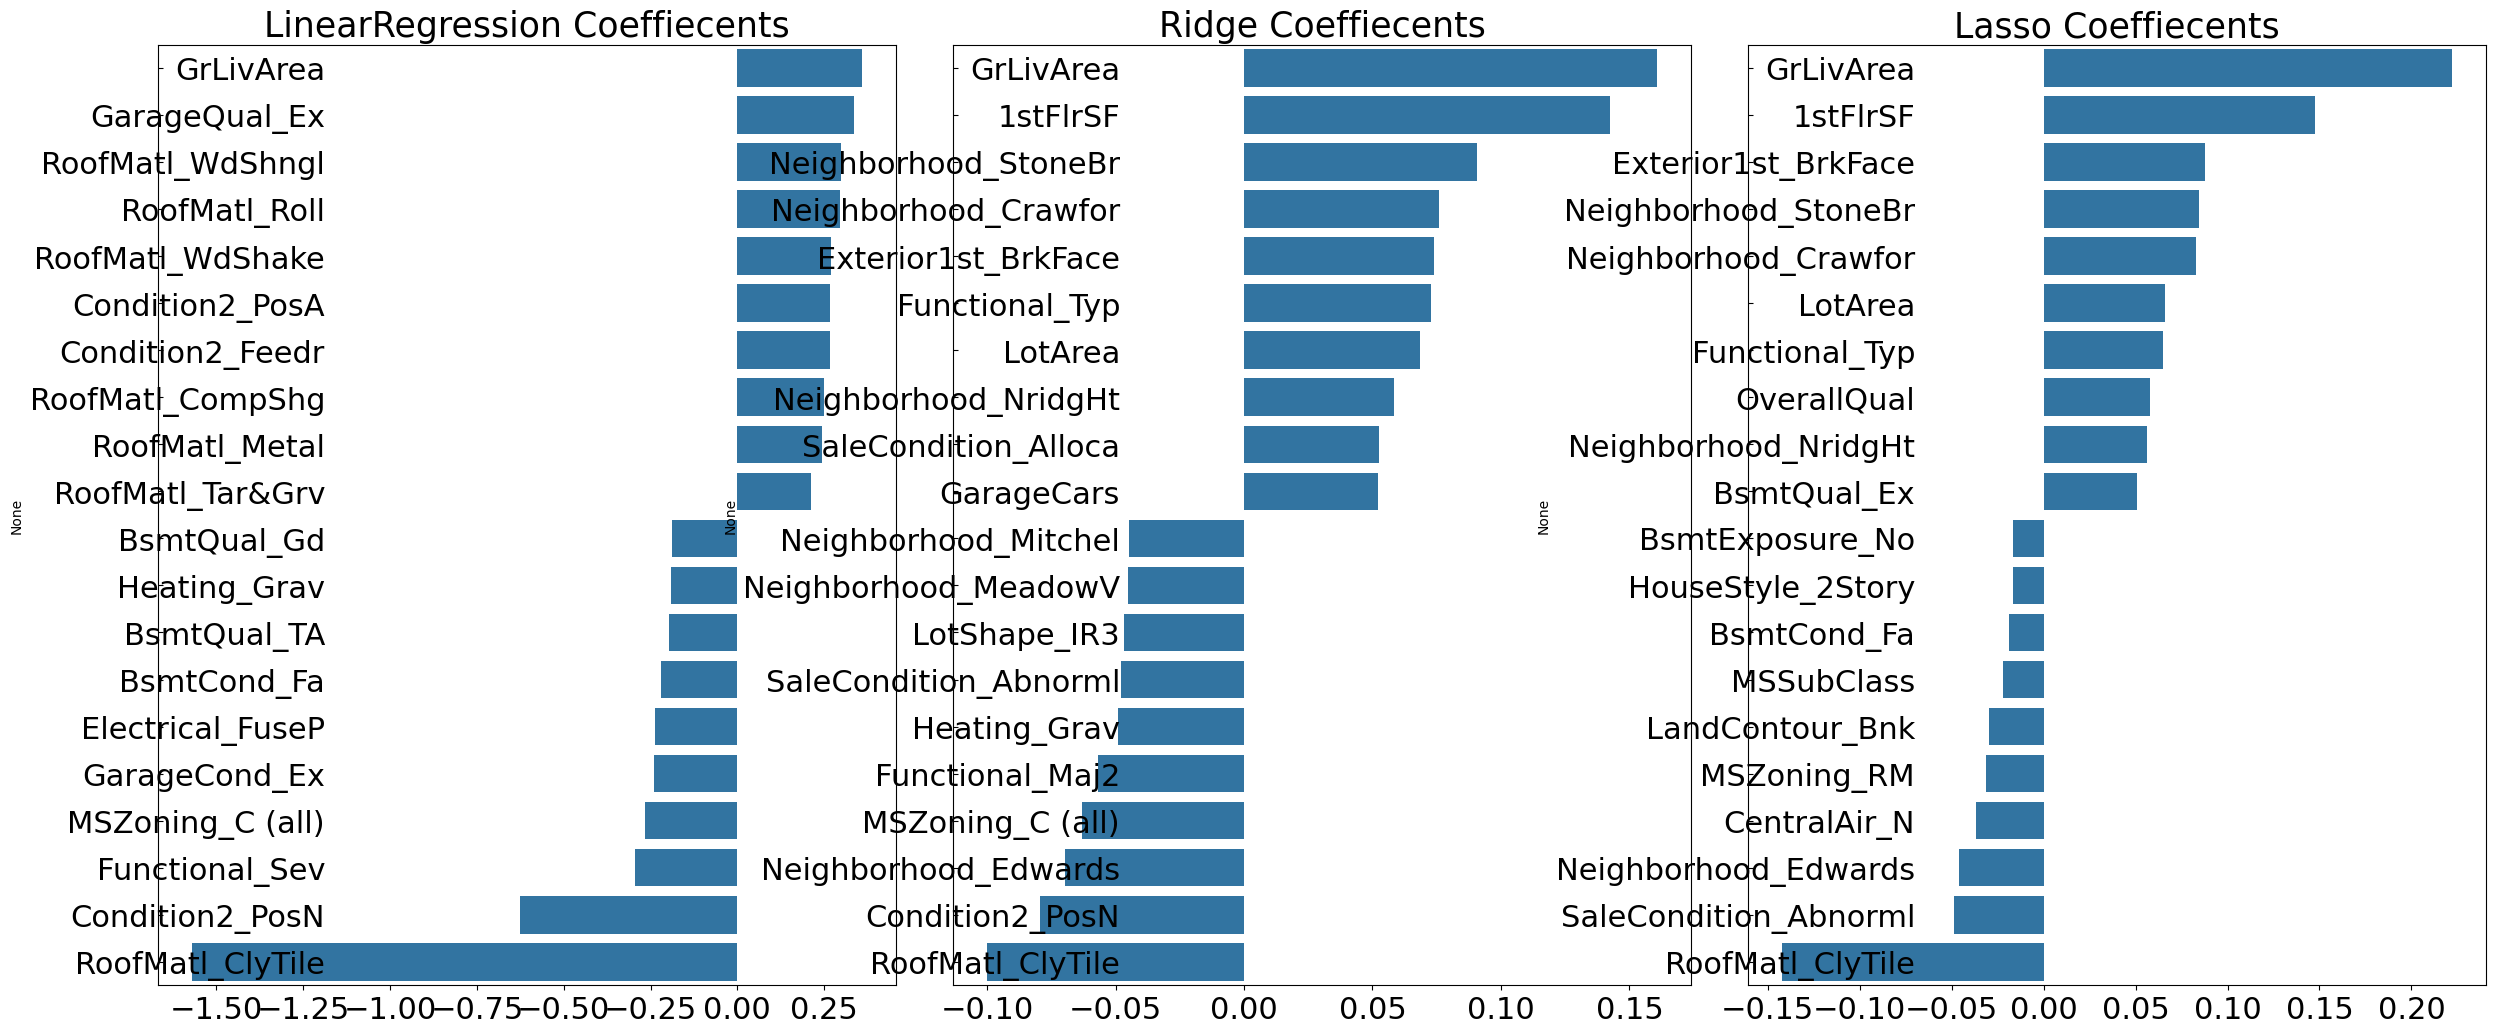

In [23]:
lr_reg = LinearRegression()
lr_reg.fit(train_X, train_y)

ridge_reg = Ridge(alpha=10)
ridge_reg.fit(train_X, train_y)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_X, train_y)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

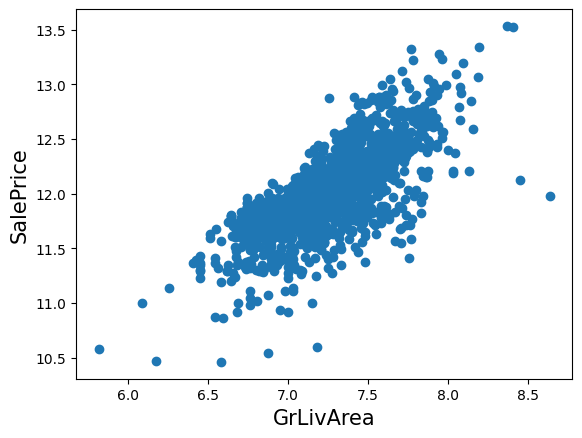

In [24]:
plt.scatter(x = df_ohe['GrLivArea'], y = df_ohe['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [25]:
cond1 = df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 df_ohe shape:', df_ohe.shape)

df_ohe.drop(outlier_index, axis=0, inplace=True)
print('아웃라이어 삭제 후 df_ohe shape:', df_ohe.shape)

아웃라이어 레코드 index : [ 523 1298]
아웃라이어 삭제 전 df_ohe shape: (1460, 270)
아웃라이어 삭제 후 df_ohe shape: (1458, 270)


In [26]:
target_y = df_ohe['SalePrice']
features_X = df_ohe.drop('SalePrice', axis=1, inplace=False)
train_X, test_X, train_y, test_y = train_test_split(features_X, target_y, test_size=0.2, random_state=42)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }

best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1125, 최적 alpha:{'alpha': 8}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1122, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.13
Ridge 로그 변환된 RMSE: 0.117
Lasso 로그 변환된 RMSE: 0.114


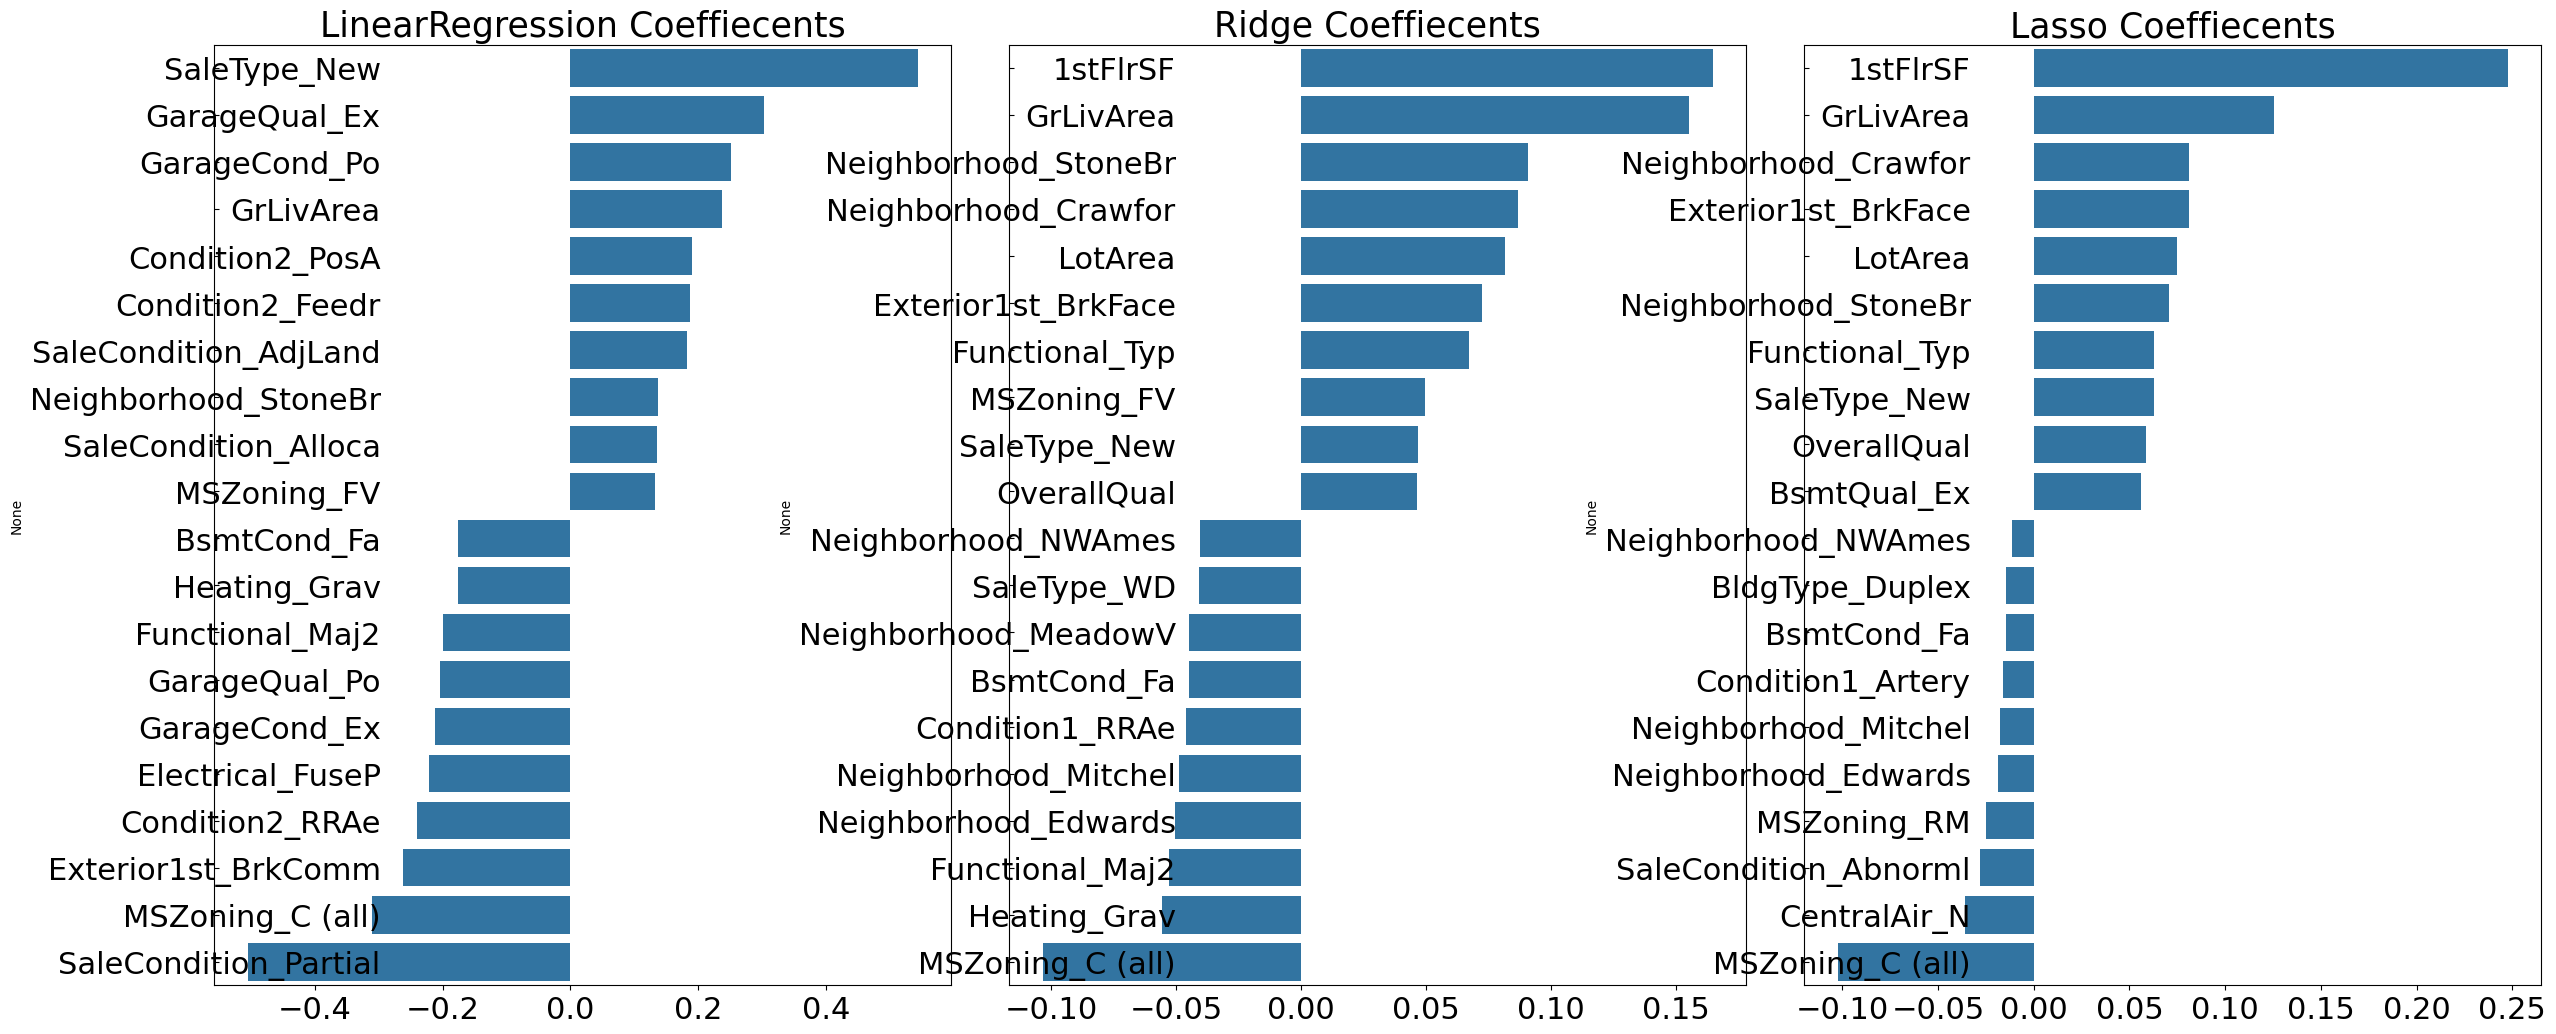

In [27]:
lr_reg = LinearRegression()
lr_reg.fit(train_X, train_y)

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(train_X, train_y)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_X, train_y)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 회귀 트리 모델 학습/예측/평가

In [28]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)

best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1206, 최적 alpha:{'n_estimators': 1000}


In [29]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1, verbose=-1)

best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1179, 최적 alpha:{'n_estimators': 1000}


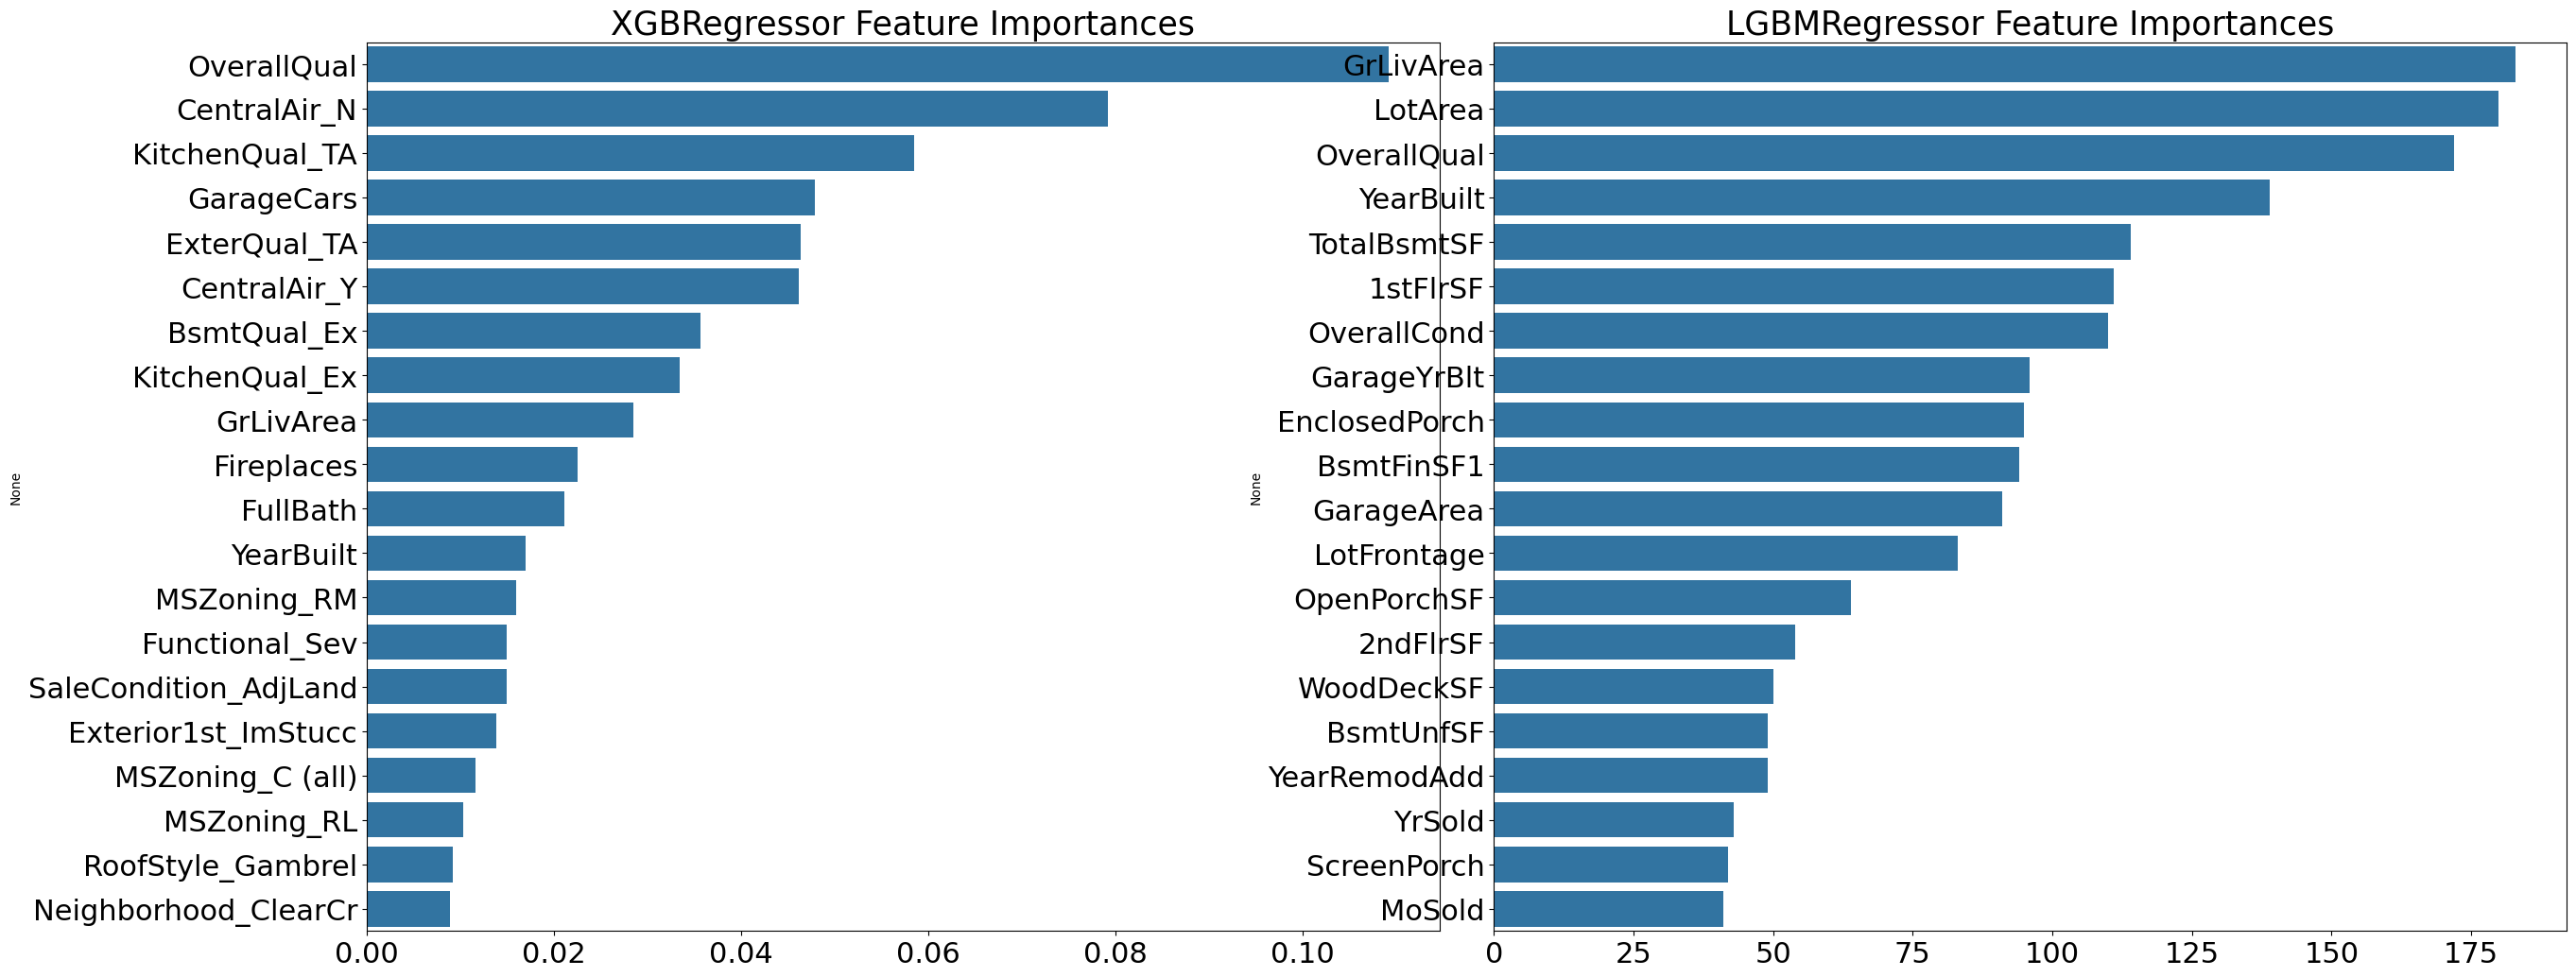

In [30]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=features_X.columns)
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    
    for i_num, model in enumerate(models):
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index, ax=axs[i_num])

models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

### 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [31]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(test_y, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(train_X, train_y)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(train_X, train_y)

ridge_pred = ridge_reg.predict(test_X)
lasso_pred = lasso_reg.predict(test_X)

pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.11380603362947915
Ridge 모델의 RMSE: 0.11703160692843878
Lasso 모델의 RMSE: 0.11363076533682782


In [32]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(train_X, train_y)
lgbm_reg.fit(train_X, train_y)

xgb_pred = xgb_reg.predict(test_X)
lgbm_pred = lgbm_reg.predict(test_X)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3159
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 169
[LightGBM] [Info] Start training from score 12.023362
최종 혼합 모델의 RMSE: 0.12064024096694449
XGBM 모델의 RMSE: 0.12599681987683353
LGBM 모델의 RMSE: 0.12162449184313093


### 스태킹 앙상블 모델을 통한 회귀 예측

In [33]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, train_X_n, train_y_n, test_X_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False)
    
    train_fold_pred = np.zeros((train_X_n.shape[0] ,1 ))
    test_pred = np.zeros((test_X_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(train_X_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        
        tr_X = train_X_n[train_index] 
        tr_y = train_y_n[train_index] 
        te_X = train_X_n[valid_index]  
        
        model.fit(tr_X, tr_y)

        train_fold_pred[valid_index, :] = model.predict(te_X).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(test_X_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    return train_fold_pred , test_pred_mean

In [34]:
train_X_n = train_X.values
test_X_n = test_X.values
train_y_n = train_y.values

train_ridge, test_ridge = get_stacking_base_datasets(ridge_reg, train_X_n, train_y_n, test_X_n, 5)
train_lasso, test_lasso = get_stacking_base_datasets(lasso_reg, train_X_n, train_y_n, test_X_n, 5)
train_xgb, test_xgb = get_stacking_base_datasets(xgb_reg, train_X_n, train_y_n, test_X_n, 5)  
train_lgbm, test_lgbm = get_stacking_base_datasets(lgbm_reg, train_X_n, train_y_n, test_X_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2934
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 159
[LightGBM] [Info] Start training from score 12.030250
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2949
[LightGBM] [Info] Number o

In [35]:
Stack_final_train_X = np.concatenate((train_ridge, train_lasso, train_xgb, train_lgbm), axis=1)
Stack_final_test_X = np.concatenate((test_ridge, test_lasso, test_xgb, test_lgbm), axis=1)

meta_model_lasso = Lasso(alpha=0.0005)
meta_model_lasso.fit(Stack_final_train_X, train_y)

final = meta_model_lasso.predict(Stack_final_test_X)

mse = mean_squared_error(test_y, final)
rmse = np.sqrt(mse)

print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11398399345187883
